# Boston House Prediction Using Multiple Linear Regression

### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Loading the Boston House dataset into pandas dataframe

Attribute Information:
- CRIM     per capita crime rate by town
- ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS    proportion of non-retail business acres per town
- CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX      nitric oxides concentration (parts per 10 million)
- RM       average number of rooms per dwelling
- AGE      proportion of owner-occupied units built prior to 1940
- DIS      weighted distances to five Boston employment centres
- RAD      index of accessibility to radial highways
- TAX      full-value property-tax rate per $10,000
- PTRATIO  pupil-teacher ratio by town
- B        1000(Bk - 0.63)^2 where Bk is the proportion of black people by town
- LSTAT    % lower status of the population
- MEDV     Median value of owner-occupied homes in $1000's

In [2]:
from sklearn.datasets import load_boston

In [3]:
boston = load_boston()

In [4]:
boston['data'].shape

(506, 13)

In [5]:
boston['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [6]:
df = pd.DataFrame(data = boston['data'], columns= boston['feature_names'])
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
target = pd.Series(boston['target'])
df['Price'] = target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### Quick EDA

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


No missing value or data type looks normal

In [9]:
bsDesc = []

for i in df.columns:
    bsDesc.append([
        i,
        df[i].isna().sum(),
        round((df[i].isna().sum() / len(df)) * 100, 2),
        df[i].nunique(),
        df[i].drop_duplicates().sample(2).values
    ])

To simplify the analysis process, look for null percentages, unique values, and unique examples.

In [10]:
pd.DataFrame(data = bsDesc,
columns = [
    'Features',
    'Null',
    'NullPercentage',
    'Unique',
    'Unique Sample'
])

,Features,Null,NullPercentage,Unique,Unique Sample
0,CRIM,0,0.0,504,"[0.09744, 5.70818]"
1,ZN,0,0.0,26,"[18.0, 100.0]"
2,INDUS,0,0.0,76,"[4.49, 5.19]"
3,CHAS,0,0.0,2,"[1.0, 0.0]"
4,NOX,0,0.0,81,"[0.605, 0.404]"
5,RM,0,0.0,446,"[4.963, 5.952]"
6,AGE,0,0.0,356,"[66.6, 58.1]"
7,DIS,0,0.0,412,"[1.9669, 1.3861]"
8,RAD,0,0.0,9,"[8.0, 3.0]"
9,TAX,0,0.0,66,"[281.0, 411.0]"


### Feature Selection

Create a boxplot to view the target distribution as a basis for determining the type of correlation

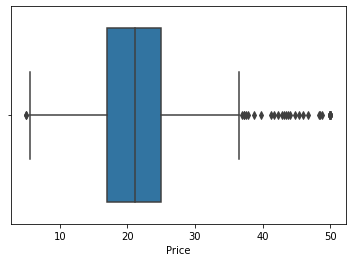

In [11]:
sns.boxplot(df['Price'])
plt.show()

Create a heatmap to drop features that have a low correlation with the target

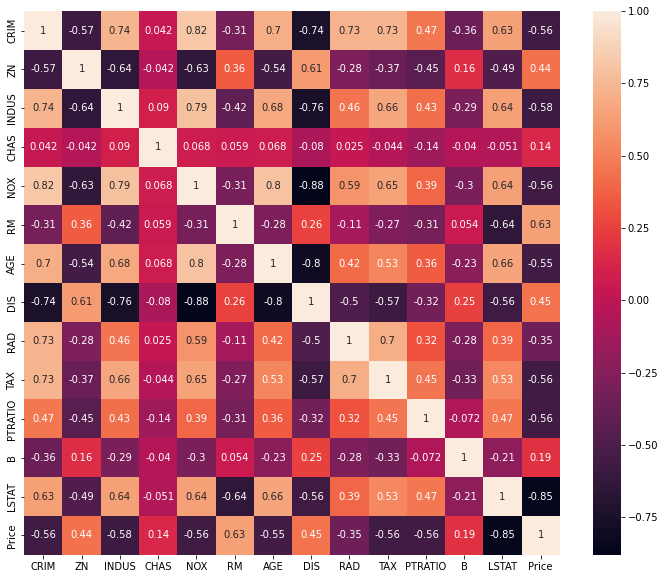

In [12]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr('spearman'), annot=True)
plt.show()

Drop features wih correlation value less than 0.5

In [13]:
df.drop(columns=['ZN', 'CHAS', 'DIS', 'RAD', 'B'], inplace=True)

### Machine Learning Modelling

Create train data and test data

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X = df.drop(columns='Price')
y = df['Price']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.20, random_state=42)

Modelling

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
Model = LinearRegression()

In [19]:
Model.fit(X_train, y_train)

LinearRegression()

### Evaluation Matrix

Plot actual data and predicted data

In [20]:
pred_train = Model.predict(X_train)

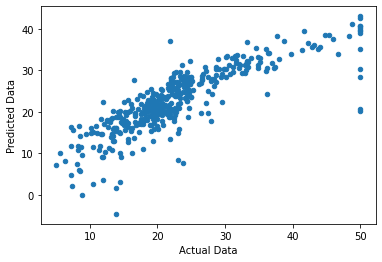

In [21]:
plt.scatter(y_train, pred_train, s=20)
plt.xlabel('Actual Data')
plt.ylabel('Predicted Data')
plt.show()

In [22]:
pred_test = Model.predict(X_test)

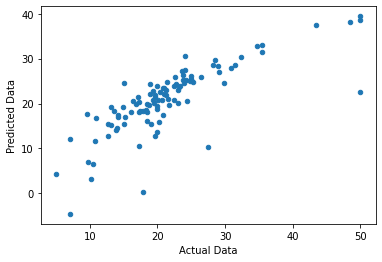

In [23]:
plt.scatter(y_test, pred_test, s=20)
plt.xlabel('Actual Data')
plt.ylabel('Predicted Data')
plt.show()

In [24]:

Training_set = pd.concat([X_train, y_train], axis = 1)

In [25]:
Testing_set = pd.concat([X_test, y_test], axis = 1)

Analyzing Error on Training Set

In [26]:
Training_set['price_pred'] = pred_train

In [27]:
Training_set['Error'] = abs(Training_set['Price'] - Training_set['price_pred'])

Plot to see the error distribution

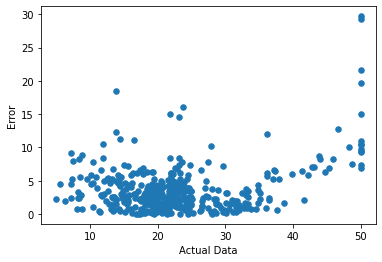

In [28]:
plt.scatter(Training_set['Price'], Training_set['Error'], s=30)
plt.xlabel("Actual Data")
plt.ylabel("Error")
plt.show()

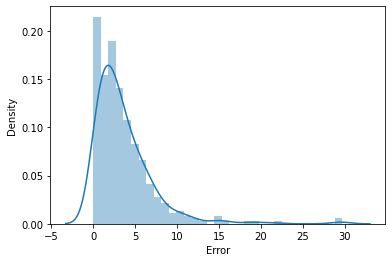

In [29]:
sns.distplot(Training_set['Error'])
plt.show()

In [30]:
Training_set['Error'].mean()

3.610671589529

In [31]:
Training_set.sort_values('Error', ascending=False).head(10)

,CRIM,INDUS,NOX,RM,AGE,TAX,PTRATIO,LSTAT,Price,price_pred,Error
368,4.89822,18.10,0.631,4.970,100.0,666.0,20.2,3.26,50.0,20.294005,29.705995
372,8.26725,18.10,0.668,5.875,89.6,666.0,20.2,8.88,50.0,20.778254,29.221746
369,5.66998,18.10,0.631,6.683,96.8,666.0,20.2,3.73,50.0,28.329133,21.670867
370,6.53876,18.10,0.631,7.016,97.5,666.0,20.2,2.96,50.0,30.356299,19.643701
374,18.49820,18.10,0.668,4.138,100.0,666.0,20.2,37.97,13.8,-4.645437,18.445437
214,0.28955,10.59,0.489,5.412,9.8,277.0,18.6,29.55,23.7,7.602734,16.097266
364,3.47428,18.10,0.718,8.780,82.9,666.0,20.2,5.29,21.9,36.987446,15.087446
186,0.05602,2.46,0.488,7.831,53.6,193.0,17.8,4.45,50.0,35.057090,14.942910
367,13.52220,18.10,0.631,3.863,100.0,666.0,20.2,13.33,23.1,8.480596,14.619404
228,0.29819,6.20,0.504,7.686,17.0,307.0,17.4,3.92,46.7,33.941764,12.758236


Drop data that has a value of TAX = 666

In [32]:
df = df[df['TAX'] != 666]

Project Limitation : There is no value of 666 in the tax feature

### Evaluation Matrix

In [33]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [34]:
def Eva_Matrix_Base_Class(model, X_train, X_test, y_train, y_test, Nama):
    Model = model.fit(X_train, y_train)
    y_pred_train = Model.predict(X_train)
    r2_tr = r2_score(y_train, y_pred_train)
    mae_tr = mean_absolute_error(y_train, y_pred_train)
    mse_tr = mean_squared_error(y_train, y_pred_train)
    rmse_tr = np.sqrt(mse_tr)
    y_pred_test = Model.predict(X_test)
    r2_ts = r2_score(y_test, y_pred_test)
    mae_ts = mean_absolute_error(y_test, y_pred_test)
    mse_ts = mean_squared_error(y_test, y_pred_test)
    rmse_ts = np.sqrt(mse_ts)
    data_LR = {
    Nama + " Training" : [round(r2_tr,2), round(mae_tr,2), round(mse_tr,2), round(rmse_tr,2)],
    Nama + " Testing"  : [round(r2_ts,2), round(mae_ts,2), round(mse_ts,2), round(rmse_ts,2)],
}

    df_eva = pd.DataFrame(data_LR, index=["R2_Score", "MAE", "MSE", "RMSE"])
    return df_eva

In [35]:
df_eva_base_model = Eva_Matrix_Base_Class(LinearRegression(), X_train, X_test, y_train, y_test, 'Linear Regression')

In [36]:
df_eva_base_model

,Linear Regression Training,Linear Regression Testing
R2_Score,0.70,0.62
MAE,3.61,3.40
MSE,26.29,28.03
RMSE,5.13,5.29


Conclusion:

According to the matrix evaluation results, machine learning modeling on Boston house price prediction data using linear regression is still underfitting.